In [150]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sve
import plotly.express as px

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [151]:
#Read in the csv file and convert to a Pandas dataframe
player=pd.read_csv(r"C:\Users\Lama\OneDrive\سطح المكتب\Twaiq\week1\Usecase-7\final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [152]:
player.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [153]:
player.shape

(10754, 22)

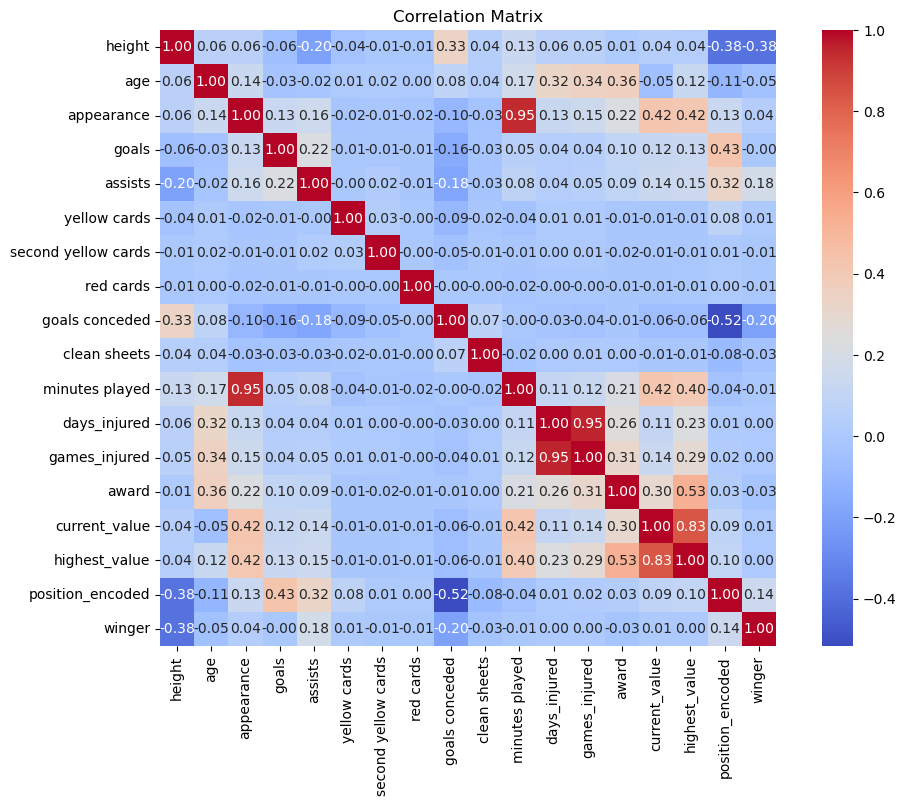

In [154]:
corr_matrix = player.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [84]:
#profile_report = player.profile_report(
   # explorative=True, html={"style": {"full_width": True}}
#)
#profile_report

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [85]:
#Data Source: in the kaggle page (https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data) 
#Open Access to data (opne source data are publicly accessible)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [86]:
#Data collection occurred for the seasons 2021-2022 and 2022-2023., addressing business problems.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [87]:
# i have data from one sources so no need to check consistency

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [155]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [156]:
#Delete unrelevent columns, this column not relevent to busniss statment and have alot null value so can change analysis data
player.drop(['player'],axis=1,inplace=True)

In [157]:
#Delete unrelevent columns, this column not relevent to busniss statment and have alot null value so can change analysis data
player.drop(['minutes played'],axis=1,inplace=True)

In [158]:
player.shape

(10754, 20)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [159]:
# check
player.duplicated().sum()

0

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [160]:
#Display number missing values per column
player.isnull().sum().sort_values(ascending= False)

team                   0
name                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [94]:
player.tail(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.0,0.0,0,0,0,50000,50000,4,0
10753,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,0.0,0.000000,0.0,0.0,0,0,0,25000,25000,4,0


In [161]:
# check columns types
player.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [162]:
# check outliers

In [166]:
fig = px.histogram(player, x='highest_value', title='Histogram of highest_value')
fig.update_layout(xaxis_title='highest_value')
fig.show()

In [164]:
player["highest_value"].describe()

count    1.075400e+04
mean     6.152606e+06
std      1.338988e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64

In [165]:
player=player[
    (player['highest_value'] < 4.000000e+07) & (player['highest_value'] > 4.900000e+05)
]

In [100]:
player.shape

(7617, 20)

In [170]:
fig = px.histogram(player, x='current_value', title='Histogram of current_value')
fig.update_layout(xaxis_title='current_value')
fig.show()

In [168]:
player["current_value"].describe()

count    7.617000e+03
mean     3.403706e+06
std      5.332438e+06
min      0.000000e+00
25%      6.000000e+05
50%      1.400000e+06
75%      3.500000e+06
max      3.800000e+07
Name: current_value, dtype: float64

In [169]:
player=player[
    (player['current_value'] <= 3.000000e+07) & (player['current_value'] > 5.00000e+05)
]

In [171]:
player.shape

(5988, 20)

In [174]:
fig = px.histogram(player, x='age', title='Histogram of age')
fig.update_layout(xaxis_title='age')
fig.show()

In [173]:
player=player[
    (player['age'] <= 37) & (player['age'] > 17)
]

In [177]:
fig = px.histogram(player, x='appearance', title='Histogram of appearance')
fig.update_layout(xaxis_title='appearance')
fig.show()

In [176]:
player=player[
    (player['appearance'] <= 89) & (player['appearance'] > 1)
]

In [180]:
fig = px.histogram(player, x='award', title='Histogram of award')
fig.update_layout(xaxis_title='award')
fig.show()

In [179]:
player=player[
    (player['award'] <= 20)
]

In [181]:
player.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

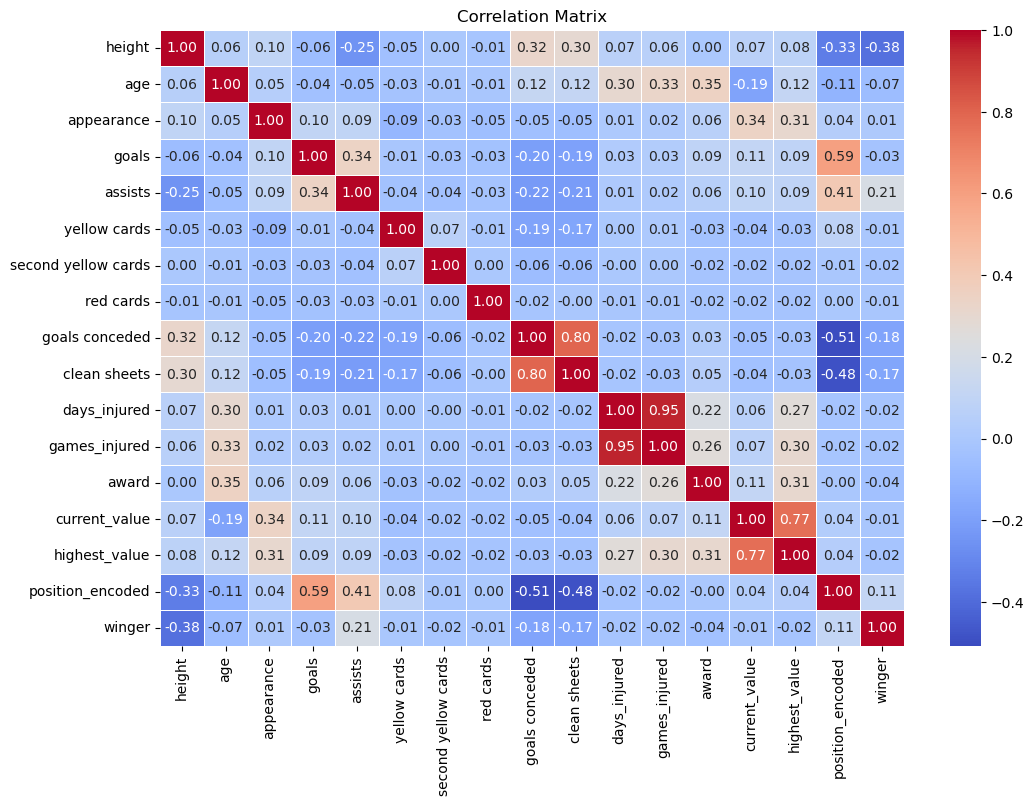

In [182]:
correlation_matrix = player.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [183]:
player.shape

(5724, 20)

In [184]:
categorical_features = ['team', 'name', 'position']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played',
                    'days_injured','games_injured','award','current_value','highest_value','position_encoded','winger']

# Bivariate/Multivariate Analysis:

### As we can observe, the high values for Attack - Second Striker and Midfield - Attacking Midfield positions are due to their roles on the field and their higher goal-scoring rates. Positions like Attack - Second Striker and Midfield - Attacking Midfield have higher average values because of their significant contribution to scoring and creating opportunities.

In [185]:
import plotly.express as px

#mean of current value  
position_avg_value = player.groupby('position')['current_value'].mean().reset_index()
#create bar char
fig = px.bar(position_avg_value, x='position', y='current_value', 
             title='Bar Chart of Position vs Average Current Value',
             labels={'position': 'Position', 'current_value': 'Average Current Value'})
fig.update_layout(xaxis_title='Position', yaxis_title='Average Current Value')
fig.show()



### Southampton FC represents the club with the highest total market value of players among the top five clubs. The other clubs have similar percentages, indicating a general balance in the market values of players across these teams

In [186]:
import plotly.express as px

# culculate the total of current value in all plyer in teame 
top_team = player.groupby('team')['current_value'].sum().nlargest(5).reset_index()
#creeat pie chart
fig = px.pie(top_team, values='current_value', names='team', title='Top 5 team by Total Player Current Value')
fig.update_traces(textinfo='percent+label')
fig.show()


### This plot shows a strong relationship between the current value and the highest value, as well as a clustering of points at lower values.

In [187]:
# scatter to show relation between highest_value and current_value
fig = px.scatter(player, x='highest_value', y='current_value', 
                 title='Scatter Plot of Current Value vs Highest Value',
                 labels={'highest_value': 'Highest Value', 'current_value': 'Current Value'})
fig.show()

#  2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [188]:
categorical_features

['team', 'name', 'position']

In [189]:
numeric_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

In [190]:
# one hot coding
player = pd.get_dummies(player, columns=categorical_features)

In [191]:
player.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,0,0,0,0,1,0,0,0,0,0
2,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,...,0,0,0,0,1,0,0,0,0,0


#### 3. Feature selection

In [192]:
correlation = player.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.767382
appearance             0.341210
team_Aston Villa       0.135084
team_Southampton FC    0.123706
                         ...   
clean sheets          -0.037641
yellow cards          -0.043235
position_Goalkeeper   -0.044135
goals conceded        -0.046438
age                   -0.185189
Name: current_value, Length: 6068, dtype: float64


In [195]:
# Set the correlation threshold
threshold = 0.1 # You can change this value based on your requirement ,i want the + and - relation 

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'goals', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Aston Villa', 'team_Atalanta BC',
       'team_Brentford FC', 'team_Chelsea FC', 'team_Everton FC',
       'team_Leeds United', 'team_Leicester City', 'team_Southampton FC',
       'team_Wolverhampton Wanderers'],
      dtype='object')

In [196]:
selected_features =['age', 'appearance', 'goals', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Aston Villa', 'team_Atalanta BC',
       'team_Brentford FC', 'team_Chelsea FC', 'team_Everton FC',
       'team_Leeds United', 'team_Leicester City', 'team_Southampton FC',
       'team_Wolverhampton Wanderers']

In [198]:
player = player[selected_features]
player.head()

,age,appearance,goals,award,current_value,highest_value,team_Arsenal FC,team_Aston Villa,team_Atalanta BC,team_Brentford FC,team_Chelsea FC,team_Everton FC,team_Leeds United,team_Leicester City,team_Southampton FC,team_Wolverhampton Wanderers
1,30.0,15,0.0,1,1500000,22000000,0,0,0,0,0,0,0,0,0,0
2,37.0,4,0.0,4,600000,6000000,0,0,0,0,0,0,0,0,0,0
6,28.0,70,0.0,10,15000000,35000000,0,0,0,0,0,0,0,0,0,0
7,31.0,8,0.0,7,2000000,20000000,0,0,0,0,0,0,0,0,0,0
8,21.0,34,0.0,0,2000000,2000000,0,0,0,0,0,0,0,0,0,0


#### 4. Prepare train and test data

In [199]:
# Prepare data
X = player.drop(['current_value'], axis=1)
y = player['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
X.shape

(5724, 15)

## Buliding the Model

In [201]:
model = LinearRegression()

In [202]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [203]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [204]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [205]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [206]:

# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 5}


## Test the Model

In [207]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled) # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## Interpretation of the Model

In [208]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [209]:
coeff_df

,Coefficient
age,-1.313470e+06
appearance,5.587806e+05
goals,1.121268e+05
award,-1.983566e+05
highest_value,3.690336e+06
team_Arsenal FC,2.459139e+05
team_Aston Villa,1.978600e+05
team_Atalanta BC,2.704762e+05
team_Brentford FC,2.314362e+05
team_Chelsea FC,1.248357e+05


In [210]:
coeff_df_ridge

,Coefficient
age,-1.311858e+06
appearance,5.595147e+05
goals,1.124009e+05
award,-1.972802e+05
highest_value,3.685299e+06
team_Arsenal FC,2.460684e+05
team_Aston Villa,1.982765e+05
team_Atalanta BC,2.707503e+05
team_Brentford FC,2.315257e+05
team_Chelsea FC,1.249968e+05


In [211]:
coeff_df_lasso

,Coefficient
age,-1.313467e+06
appearance,5.587772e+05
goals,1.121213e+05
award,-1.983512e+05
highest_value,3.690336e+06
team_Arsenal FC,2.459087e+05
team_Aston Villa,1.978547e+05
team_Atalanta BC,2.704713e+05
team_Brentford FC,2.314311e+05
team_Chelsea FC,1.248306e+05


In [212]:
print(f" Linear regression intercept: {model.intercept_:2e}") 
print(f" Ridge model intercept: {best_model_ridge.intercept_:2e}") 
print(f" Lasso model intercept: {best_model_lasso.intercept_:2e}")

 Linear regression intercept: 3.895234e+06
 Ridge model intercept: 3.895234e+06
 Lasso model intercept: 3.895234e+06


## Evaluating the Model 

1. Mean Square Error

In [213]:
y_base = [y_train.mean()] * len(y_test)

In [214]:
# our benchmark model (if you dont have benchmarke create one by mean)
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 2.708416e+13


In [215]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training: 7.710870e+12
Mean Squared Error for testing: 8.044764e+12
Mean Squared Error for training ridge model: 7.710892e+12
Mean Squared Error for testing ridge model: 8.044423e+12
Mean Squared Error for training lasso model: 7.710870e+12
Mean Squared Error for testing lasso model: 8.044773e+12


2. Mean Absolute Error

In [216]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 3.388384e+06


In [217]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')


# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training: 1.848942e+06
Mean Absolute Error for testing: 1.859926e+06
Mean Absolute Error for training ridge model: 1.848633e+06
Mean Absolute Error for testing ridge model: 1.859368e+06
Mean Absolute Error for training lasso model: 1.848940e+06
Mean Absolute Error for testing lasso model: 1.859925e+06


3. Root Mean Squared Error

In [218]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 5.204244e+06


In [219]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')


# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training: 2.776845e+06
Root Mean Squared Error for testing: 2.836329e+06
Root Mean Squared Error for training ridge model: 2.776849e+06
Root Mean Squared Error for testing ridge model: 2.836269e+06
Root Mean Squared Error for training lasso model: 2.776845e+06
Root Mean Squared Error for testing lasso model: 2.836331e+06


4. R Square

In [220]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training: 0.6926136869244377
R Square for testing: 0.7029328909750834
R Square for training ridge model: 0.6926128150540005
R Square for testing ridge model: 0.702945478894274
R Square for training lasso model: 0.6926136869107428
R Square for testing lasso model: 0.7029325656481917


#### Predictions vs. Real Values

In [221]:
predictions = model.predict(X_test_scaled)
#predictions

In [222]:
Real_Values = np.array(y_test)
#Real_Values

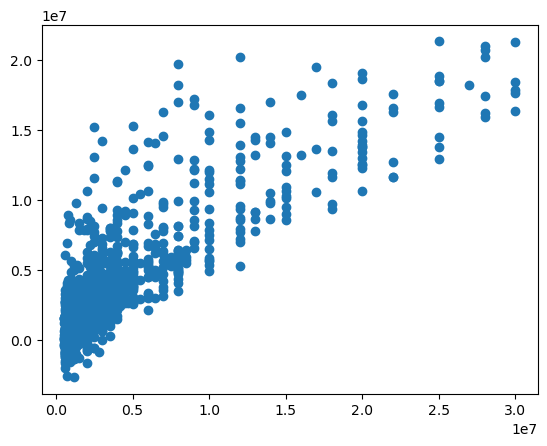

In [223]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

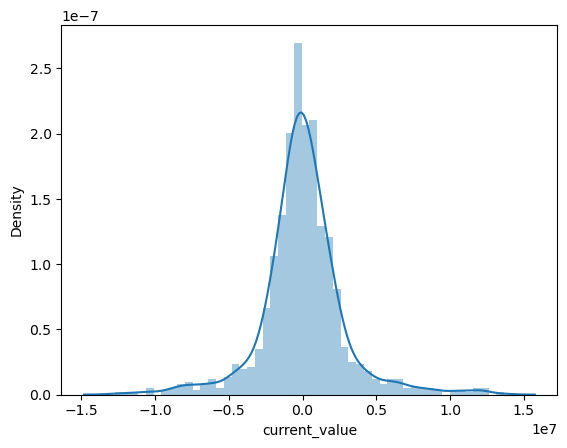

In [224]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution